In [30]:
import keras 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

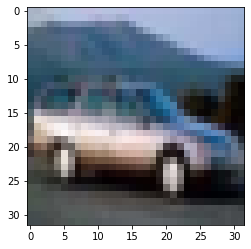

In [32]:
plt.imshow(x_train[4])


In [33]:
x_train.shape

(50000, 32, 32, 3)

In [34]:
x_train = x_train / 255.0
x_test = x_test / 255.0   #normalization

In [35]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [36]:
from keras.utils.np_utils import to_categorical            ## one hot encoding 
y_train = to_categorical(y_train, num_classes = 10)

In [37]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop , Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding= 'Same', 
                 activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 16, kernel_size = (3,3), padding= 'Same', 
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))
model.add(Dropout(0.25))

## Fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu')) ## first hidden layer
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax')) # output layer   ## softmax multiclass classification 


In [41]:
optimizer = Adam(lr = 0.001 , beta_1 = 0.9 , beta_2 = 0.999) 

In [42]:
model.compile(optimizer = optimizer, loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
epochs = 10

model.fit(x_train, y_train,
          epochs= epochs)


Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2794 - accuracy: 0.5451
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2562 - accuracy: 0.5537
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2265 - accuracy: 0.5623
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2057 - accuracy: 0.5716
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1869 - accuracy: 0.5782
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1732 - accuracy: 0.5834
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1596 - accuracy: 0.5904
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1394 - accuracy: 0.5951
Epoch 9/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1280 - accuracy: 0.6017
Epoch 10/10
1563/1563 [==============================] - 50s 32m

In [45]:
predicts = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score

In [46]:
score = accuracy_score(predicts, y_test)
print('Test accuracy:', score)

Test accuracy: 0.6452
